In [37]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
# Import geopandas
import geopandas as gpd
# import Folium
import folium

In [38]:
shapefile_path = './DATASET/Principales Ejes viales/ejes_viales.shp'
# Read in the services district shapefile and look at the first few rows.
ejes_viales = gpd.read_file(shapefile_path)
print(ejes_viales.head())

             Name                                         descriptio  \
0     EJE 1 NORTE  DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...   
1   EJE 1 ORIENTE  DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...   
2  EJE 1 PONIENTE  DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...   
3       EJE 1 SUR  DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...   
4     EJE 1-A SUR  DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...   

     tipo_vial                               entre id_vial  \
0  EJES VIALES      CIRCUITO INTERIOR Y PERIFERICO       1   
1  EJES VIALES          PERIFERICO Y EJE 2 ORIENTE       2   
2  EJES VIALES      PERIFERICO Y CIRCUITO INTERIOR       3   
3  EJES VIALES   CIRCUITO INTERIOR Y EJE 1 ORIENTE       4   
4  EJES VIALES  EJE 1 PONIENTE Y CIRCUITO INTERIOR       5   

                                            geometry  
0  LINESTRING Z (482714.673 2150424.403 0.000, 48...  
1  MULTILINESTRING Z ((485585.145 2138927.041 0.0...  
2  MULTILINESTRING Z ((482143

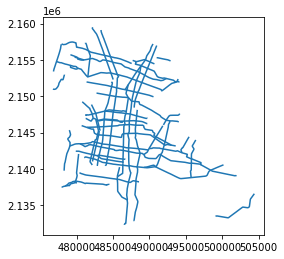

In [39]:
ejes_viales.plot()
plt.show()

In [40]:
# Center point for Nashville
cdmx = [19.432608, -99.133209]

# Create map
m = folium.Map(location=cdmx, zoom_start=10)
m

In [41]:
# Print info
print('Tipo de datos')
print(type(ejes_viales))

print('Columnas del shape')
print(ejes_viales.columns)

print('Geoseries')
print(type(ejes_viales.geometry))

print('CRS')
print(ejes_viales.crs)
# ejes_viales.set_crs(epsg=4326)
# ejes_viales.crs = {'init' :'epsg:4326'}
# ejes_viales = ejes_viales.to_crs(epsg=4326)
ejes_viales = ejes_viales.to_crs(epsg=4326)
print(ejes_viales.crs)

print('SHAPE')
print(ejes_viales.shape)

print('Info')
print(ejes_viales.info())

Tipo de datos
<class 'geopandas.geodataframe.GeoDataFrame'>
Columnas del shape
Index(['Name', 'descriptio', 'tipo_vial', 'entre', 'id_vial', 'geometry'], dtype='object')
Geoseries
<class 'geopandas.geoseries.GeoSeries'>
CRS
epsg:32614
epsg:4326
SHAPE
(38, 6)
Info
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        38 non-null     object  
 1   descriptio  38 non-null     object  
 2   tipo_vial   38 non-null     object  
 3   entre       38 non-null     object  
 4   id_vial     38 non-null     object  
 5   geometry    38 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 1.9+ KB
None


In [42]:
# folium.GeoJsonTooltip(fields=['Name']).add_to(g)
def getColor(feature):
    match int(feature['id']):
        case 1:
            return 'red'
        case 2:
            return 'green'
        case _:
            return 'red'

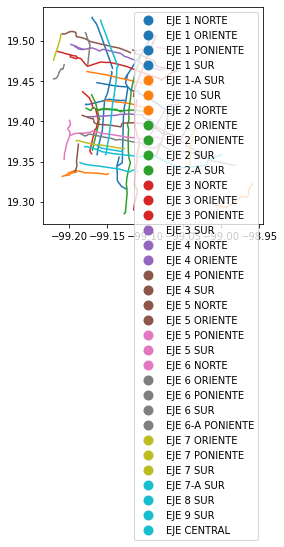

In [43]:
# Geojson
geopath = ejes_viales.geometry.to_json()
# print(geopath)
poligonos = folium.features.GeoJson(geopath, style_function=lambda x: {
    'color': getColor(x)
})
print(poligonos)
m.add_child(poligonos)
folium.LayerControl().add_to(m)

ejes_viales.plot("Name", legend=True)
plt.show()

In [44]:
m

In [45]:
ejes_viales.explore(tiles="CartoDB dark_matter", legend=True)

In [46]:
import re

# ejeNumber = re.findall(r"\d", "EJE 1-A SUR")
# display(int(ejeNumber[0]))
def getEjeName(columnName: str):
    result = re.findall(r"\d+", columnName)
    ejeNumber = 0
    if len(result) > 0:
        ejeNumber = int(result[0])

    match ejeNumber:
        case 1:
            return "EJE 1"
        case 2:
            return "EJE 2"
        case 3:
            return "EJE 3"
        case 4:
            return "EJE 4"
        case 5:
            return "EJE 5"
        case 6:
            return "EJE 6"
        case 7:
            return "EJE 7"
        case 8:
            return "EJE 8"
        case 9:
            return "EJE 9"
        case 10:
            return "EJE 10"
        case _:
            return "EJE CENTRAL"



In [47]:
ejes_viales2 = ejes_viales
ejes_viales2['Eje']  = ejes_viales2.apply(lambda x: getEjeName(x.Name), axis=1)
ejes_viales2.head(10)

,Name,descriptio,tipo_vial,entre,id_vial,geometry,Eje
0,EJE 1 NORTE,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,CIRCUITO INTERIOR Y PERIFERICO,1,"LINESTRING Z (-99.16468 19.44816 0.00000, -99....",EJE 1
1,EJE 1 ORIENTE,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,PERIFERICO Y EJE 2 ORIENTE,2,MULTILINESTRING Z ((-99.13724 19.34427 0.00000...,EJE 1
2,EJE 1 PONIENTE,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,PERIFERICO Y CIRCUITO INTERIOR,3,MULTILINESTRING Z ((-99.17020 19.53008 0.00000...,EJE 1
3,EJE 1 SUR,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,CIRCUITO INTERIOR Y EJE 1 ORIENTE,4,"LINESTRING Z (-99.12563 19.42558 0.00000, -99....",EJE 1
4,EJE 1-A SUR,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,EJE 1 PONIENTE Y CIRCUITO INTERIOR,5,"LINESTRING Z (-99.15368 19.42587 0.00000, -99....",EJE 1
5,EJE 10 SUR,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,AUTOPISTA MEXICO-PUEBLA Y MAR FRIO,6,"LINESTRING Z (-99.00867 19.29498 0.00000, -99....",EJE 10
6,EJE 10 SUR,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,PERIFERICO Y PACIFICO,7,MULTILINESTRING Z ((-99.21031 19.33132 0.00000...,EJE 10
7,EJE 2 NORTE,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,OCEANIA Y CUITLAHUAC,8,"LINESTRING Z (-99.09002 19.44370 0.00000, -99....",EJE 2
8,EJE 2 ORIENTE,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,EJE 1 ORIENTE Y PERIFERICO,9,"LINESTRING Z (-99.12794 19.28440 0.00000, -99....",EJE 2
9,EJE 2 PONIENTE,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,UNIVERSIDAD Y CIRCUITO INTERIOR,10,MULTILINESTRING Z ((-99.15983 19.40155 0.00000...,EJE 2


In [50]:
m2 = ejes_viales2.explore(
    column="Eje",
    tooltip="Name", # show "BoroName" value in tooltip (on hover)
    popup=True, # show all values in popup (on click)
    tiles="CartoDB positron", # use "CartoDB positron" tiles matplotlib colormap
)
m2

In [51]:
# Guardamos el Mapa para futuras referencias
m2.save("D:\Workspace\ws_python\semovi\ejes\index.html")